In [3]:
import sys
sys.path.insert(0, "../python")

from propagation import laser
from ionization import ionization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from scipy import integrate
from numpy.fft import fft, ifft, fft2, ifft2, fftfreq

In [4]:
ionization.field_from_intensity(1.0)

27.449200000000001

In [5]:
# Setup x lattice
Nx = 2**9
X = 250
x = np.linspace(-X/2, X/2, Nx, False)
# Setup z lattice
Nz = 2**9
Z = 250
z = np.linspace(0, Z, Nz)
# Setup t lattice
Nt = 1024
T = 1000
t = np.linspace(-T/2, T/2, Nt, False)

# Create input Gaussian beam
w0 = 5
tau = 100
f = 0.3
E0 = np.exp(-x**2 / w0**2)
Et = ionization.gaussian_field(1.0, t, f, tau).real

# Create each frequency component
e = laser.pulse_prop(E0, Et, x, z, t, c=0.3)

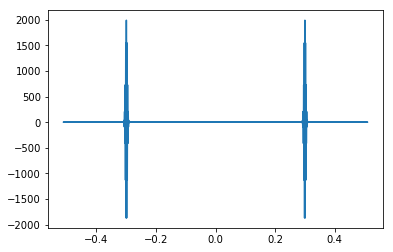

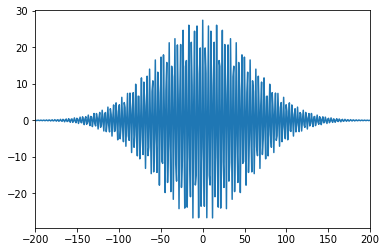

In [6]:
a = fft(Et).real
dt = T / (Nt-1)
plt.plot(fftfreq(Nt, dt), a)
plt.show()
plt.plot(t, Et)
plt.xlim([-200,200])
plt.show()

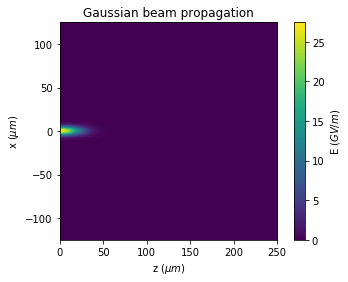

In [7]:
et = laser.pulse_time(e, t, -500)
plt.imshow(np.flipud(np.transpose(abs(et[:,:]))), extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel(r'x ($\mu m$)')
plt.title('Gaussian beam propagation')
plt.show()

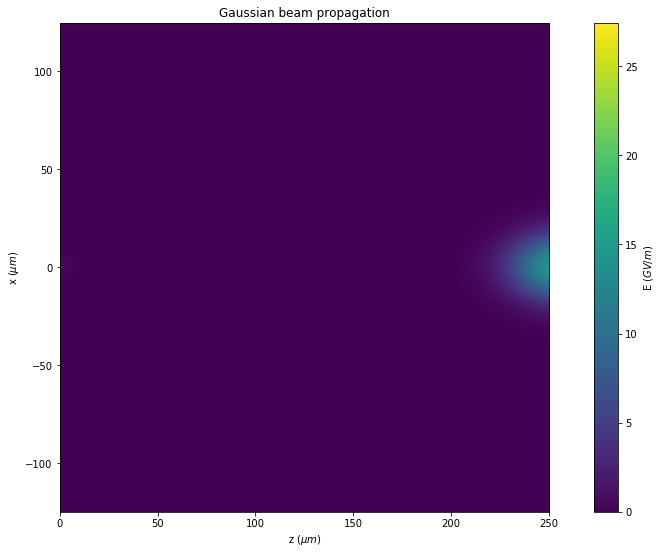

In [9]:
Ntime = 120
time = np.linspace(-500, 500, Ntime, False)
et = laser.pulse_time(e, t, time)

fig = plt.figure(figsize=(16, 9))

im = plt.imshow(np.flipud(np.transpose(abs(et[0,:,:]))), animated=True, extent=[0, Z, -X/2, X/2])
cb = plt.colorbar()
cb.set_label(r'E ($GV/m$)')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel(r'x ($\mu m$)')
plt.title('Gaussian beam propagation')
i = 1;

def updatefig(*args):
    global i
    im.set_array(np.flipud(np.transpose(abs(et[i,:,:]))))
    i += 1
    if i==Ntime:
        i=0
    return im,

ani = animation.FuncAnimation(fig, updatefig, blit=True)
ani.save(r'C:\Users\robert\Dropbox\Research\temp\Gaussian_Pulse.mp4', fps=30)
plt.show()